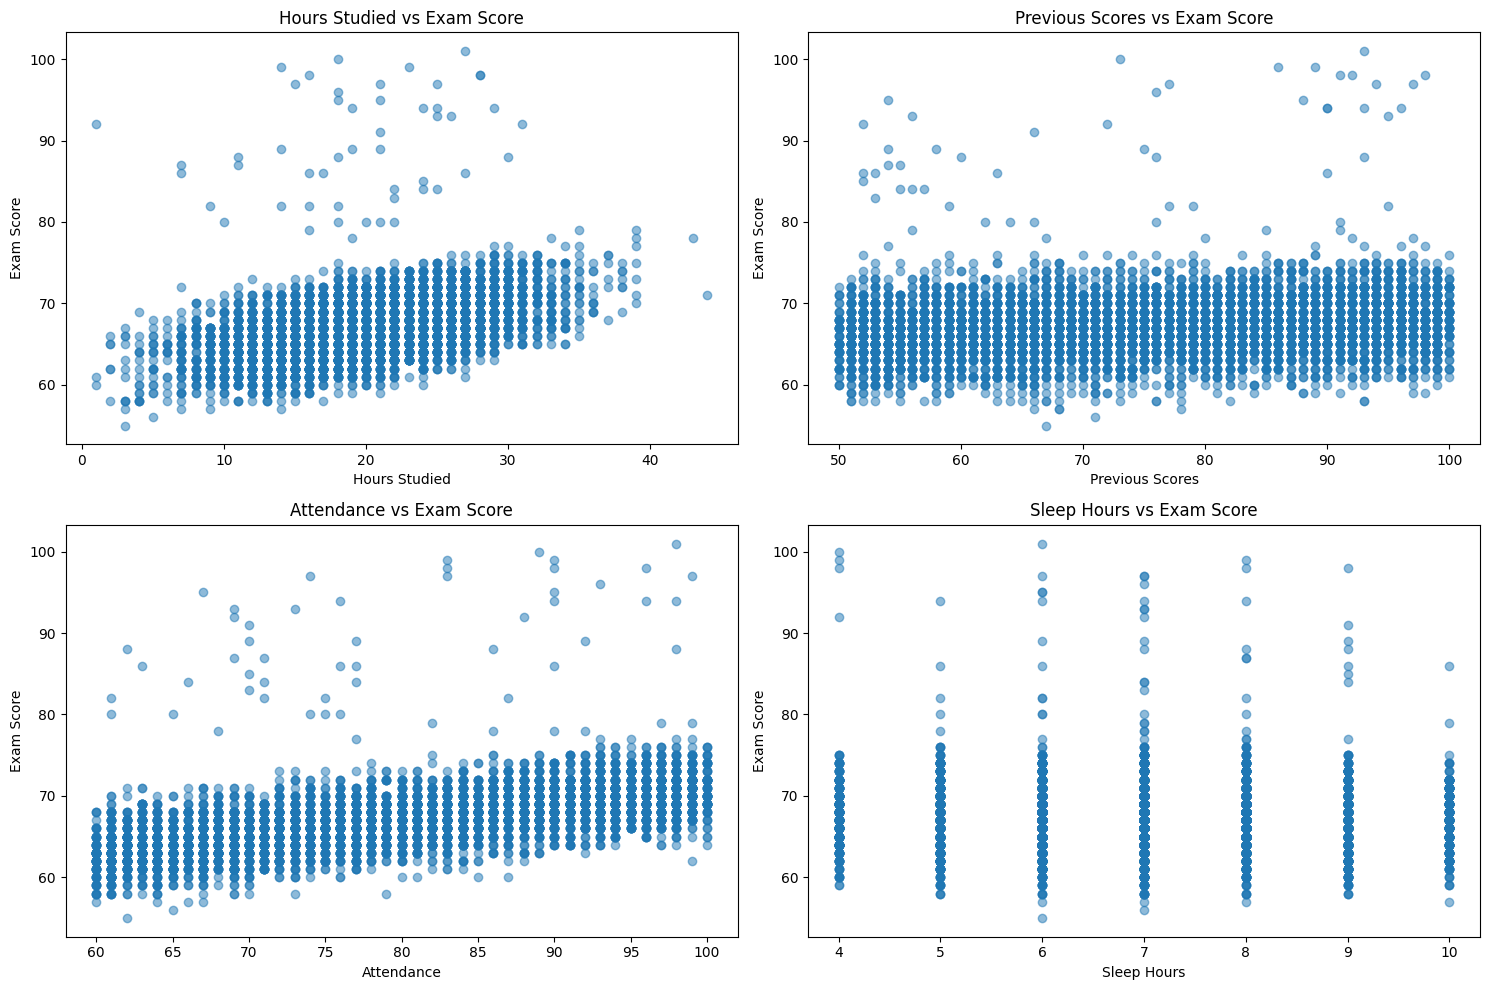

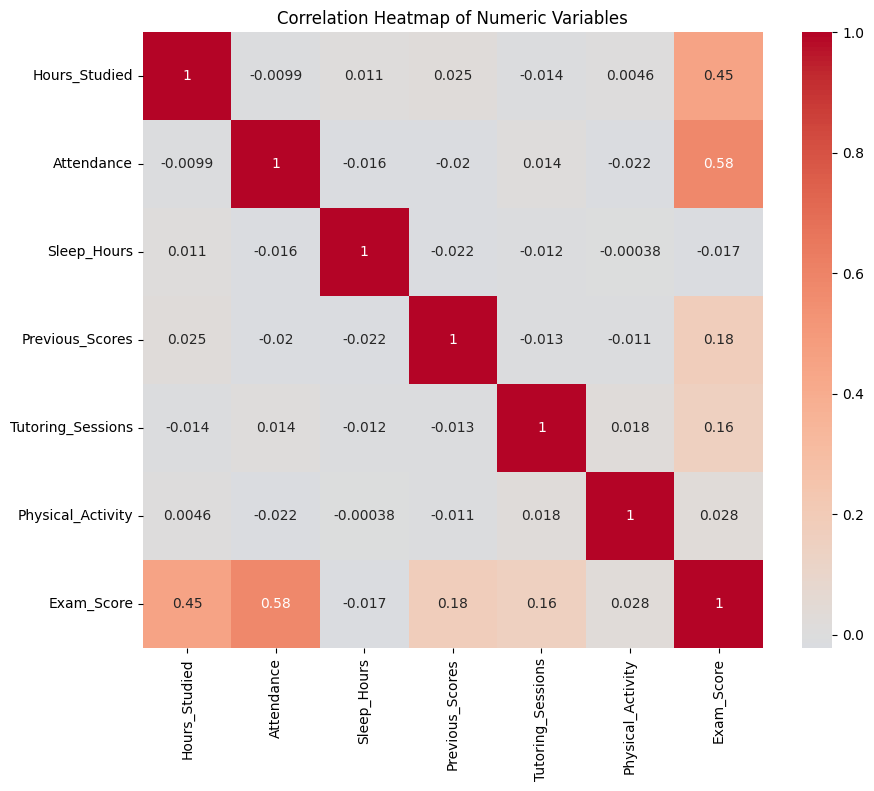

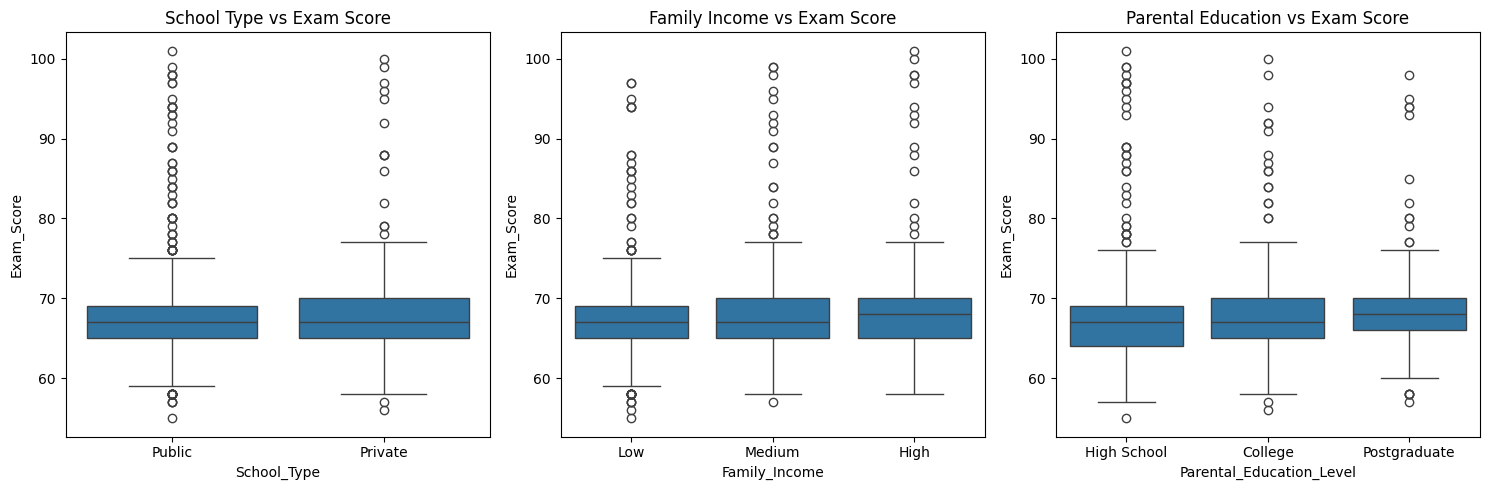


Basic Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

Correlation with Exam Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


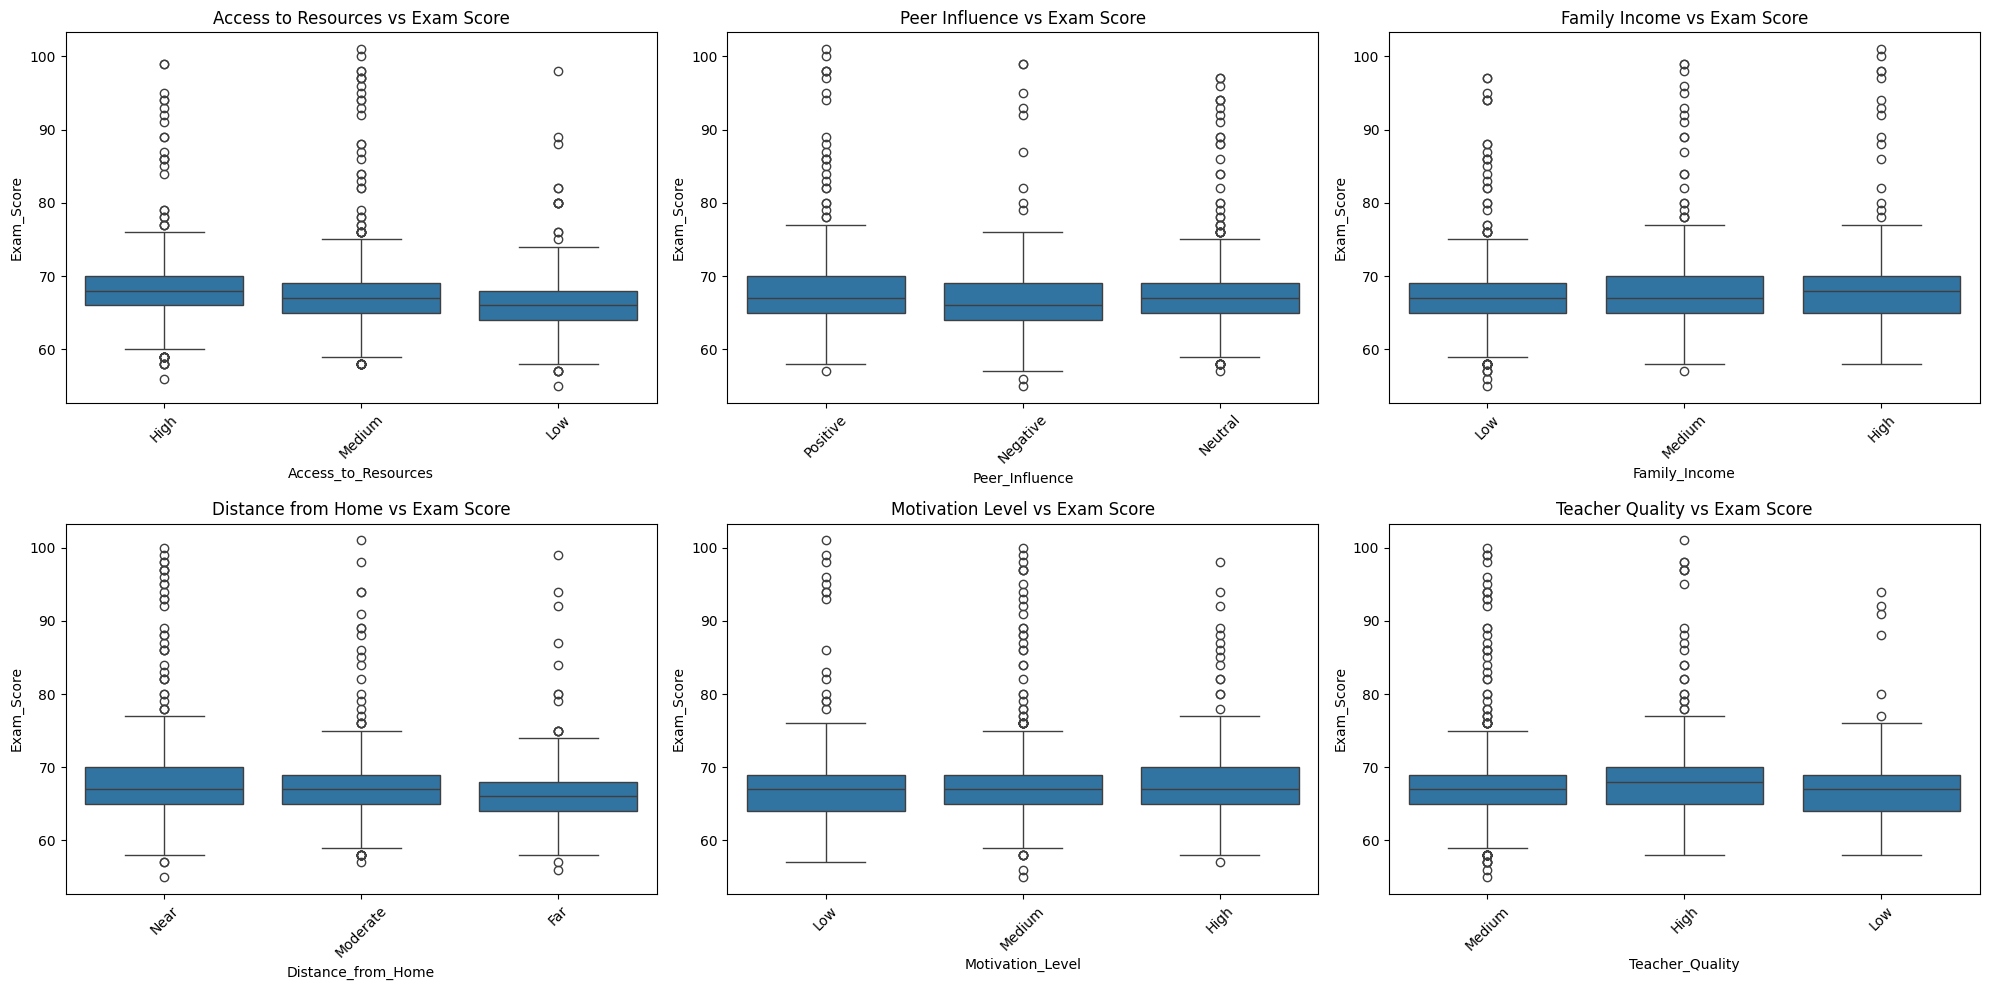


Mean Exam Scores by Category:

Access_to_Resources:
Access_to_Resources
High      68.092152
Medium    67.134378
Low       66.203351
Name: Exam_Score, dtype: float64

Peer_Influence:
Peer_Influence
Positive    67.623199
Neutral     67.197917
Negative    66.564270
Name: Exam_Score, dtype: float64

Family_Income:
Family_Income
High      67.842396
Medium    67.334959
Low       66.848428
Name: Exam_Score, dtype: float64

Distance_from_Home:
Distance_from_Home
Near        67.512101
Moderate    66.981481
Far         66.457447
Name: Exam_Score, dtype: float64

Motivation_Level:
Motivation_Level
High      67.704321
Medium    67.330648
Low       66.752194
Name: Exam_Score, dtype: float64

Teacher_Quality:
Teacher_Quality
High      67.676939
Medium    67.109299
Low       66.753425
Name: Exam_Score, dtype: float64


In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model
import seaborn as sns

# Read and clean the data
df = pd.read_csv('StudentPerformanceFactors.csv')

# Convert categorical variables to numeric using one-hot encoding
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                      'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                      'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                      'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Create one-hot encoded columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Create some initial visualizations
plt.figure(figsize=(15, 10))

# 1. Hours Studied vs Exam Score
plt.subplot(2, 2, 1)
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')

# 2. Previous Scores vs Exam Score
plt.subplot(2, 2, 2)
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Exam Score')
plt.title('Previous Scores vs Exam Score')

# 3. Attendance vs Exam Score
plt.subplot(2, 2, 3)
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')

# 4. Sleep Hours vs Exam Score
plt.subplot(2, 2, 4)
plt.scatter(df['Sleep_Hours'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.title('Sleep Hours vs Exam Score')

plt.tight_layout()
plt.show()

# Create correlation heatmap for numeric columns
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                  'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Box plots for categorical variables
plt.figure(figsize=(15, 5))

# 1. School Type vs Exam Score
plt.subplot(1, 3, 1)
sns.boxplot(x='School_Type', y='Exam_Score', data=df)
plt.title('School Type vs Exam Score')

# 2. Family Income vs Exam Score
plt.subplot(1, 3, 2)
sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Family Income vs Exam Score')

# 3. Parental Education vs Exam Score
plt.subplot(1, 3, 3)
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=df)
plt.title('Parental Education vs Exam Score')

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics:")
print(df['Exam_Score'].describe())

# Print correlation with Exam Score
print("\nCorrelation with Exam Score:")
correlations = df[numeric_columns].corr()['Exam_Score'].sort_values(ascending=False)
print(correlations)

# Additional box plots for categorical variables
plt.figure(figsize=(20, 10))

# First row
plt.subplot(2, 3, 1)
sns.boxplot(x='Access_to_Resources', y='Exam_Score', data=df)
plt.title('Access to Resources vs Exam Score')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(x='Peer_Influence', y='Exam_Score', data=df)
plt.title('Peer Influence vs Exam Score')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Family Income vs Exam Score')
plt.xticks(rotation=45)

# Second row
plt.subplot(2, 3, 4)
sns.boxplot(x='Distance_from_Home', y='Exam_Score', data=df)
plt.title('Distance from Home vs Exam Score')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Motivation Level vs Exam Score')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(x='Teacher_Quality', y='Exam_Score', data=df)
plt.title('Teacher Quality vs Exam Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Calculate mean scores for each category
categories = ['Access_to_Resources', 'Peer_Influence', 'Family_Income', 
             'Distance_from_Home', 'Motivation_Level', 'Teacher_Quality']

print("\nMean Exam Scores by Category:")
for category in categories:
    print(f"\n{category}:")
    print(df.groupby(category)['Exam_Score'].mean().sort_values(ascending=False))